In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('pmsm_temperature_data2.csv')

In [4]:
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145


In [5]:
df_corr = df.corr()
df_corr

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
ambient,1.000000,0.434435,0.194754,0.087430,0.078283,-0.262264,0.005605,-0.260562,0.501496,0.451616,0.396742,0.301883
coolant,0.434435,1.000000,0.178708,0.027851,-0.033332,-0.189617,0.108489,-0.186060,0.430548,0.874037,0.689003,0.509298
u_d,0.194754,0.178708,1.000000,-0.027472,-0.233828,-0.821325,0.358517,-0.796586,-0.082564,0.041428,-0.066256,-0.150714
u_q,0.087430,0.027851,-0.027472,1.000000,0.716897,-0.037262,-0.181855,-0.026348,0.101236,0.106186,0.149017,0.125445
motor_speed,0.078283,-0.033332,-0.233828,0.716897,1.000000,0.024517,-0.722914,0.006323,0.332419,0.182564,0.333909,0.393154
torque,-0.262264,-0.189617,-0.821325,-0.037262,0.024517,1.000000,-0.239059,0.996560,-0.072905,-0.092207,-0.011055,0.080981
i_d,0.005605,0.108489,0.358517,-0.181855,-0.722914,-0.239059,1.000000,-0.204230,-0.299227,-0.179903,-0.387712,-0.539924
i_q,-0.260562,-0.186060,-0.796586,-0.026348,0.006323,0.996560,-0.204230,1.000000,-0.086486,-0.098753,-0.025191,0.060949
pm,0.501496,0.430548,-0.082564,0.101236,0.332419,-0.072905,-0.299227,-0.086486,1.000000,0.695014,0.768352,0.729561
stator_yoke,0.451616,0.874037,0.041428,0.106186,0.182564,-0.092207,-0.179903,-0.098753,0.695014,1.000000,0.949898,0.845144


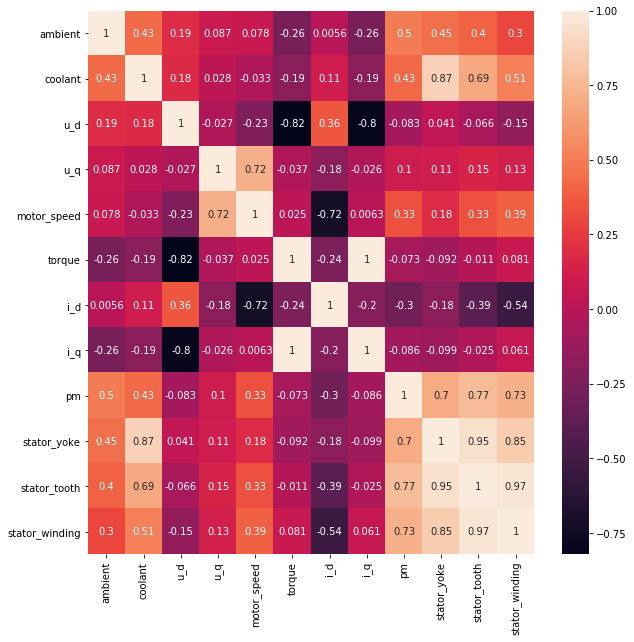

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot = True)

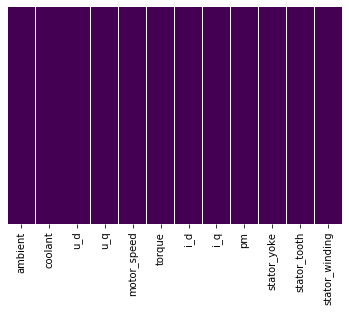

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')

In [8]:
#sns.countplot(x ="motor_speed", data = df)

# Train Test Split

In [9]:
df.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding'],
      dtype='object')

In [10]:
X = df[['ambient', 'coolant', 'u_d', 'u_q', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding']]

In [11]:
y = df['motor_speed']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(lm.intercept_)

0.0007783380721828673


In [17]:
lm.coef_

array([-0.05016636,  0.41043281, -0.16654706,  0.53970152, -0.34949066,
       -0.65762952,  0.14268169,  0.10587921, -1.62847111,  2.31637338,
       -1.16601457])

In [18]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])
cdf

,Coeff
ambient,-0.050166
coolant,0.410433
u_d,-0.166547
u_q,0.539702
torque,-0.349491
i_d,-0.657630
i_q,0.142682
pm,0.105879
stator_yoke,-1.628471
stator_tooth,2.316373


In [19]:
predictions = lm.predict(X_test)

In [20]:
predictions

array([ 1.26600658,  1.41345289,  1.21830654, ..., -1.28134765,
       -0.15077567,  1.42655811])

In [21]:
y_test

383278    1.317709
145967    1.888851
339705    0.941938
60468     0.130300
703641   -1.222432
            ...   
42237     1.483026
815045   -0.320957
206003   -1.195388
18362    -0.140246
3788      2.024122
Name: motor_speed, Length: 299421, dtype: float64

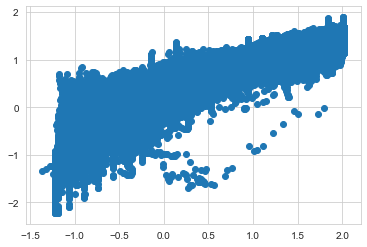

In [22]:
sns.set_style('whitegrid')
plt.scatter(y_test, predictions)

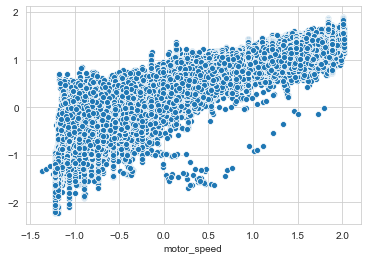

In [23]:
sns.set_style('whitegrid')
sns.scatterplot(y_test, predictions)

In [24]:
from sklearn import metrics

In [25]:
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.20077216456207597
0.07205450906041977
0.2684297097201049


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

# Scaling using Standard Scaler

In [27]:
from sklearn.preprocessing import StandardScaler #scaling the data

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(df.drop('motor_speed', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
 scaled_features = scaler.transform(df.drop('motor_speed', axis = 1))

In [31]:
col = df.columns.drop('motor_speed')

In [32]:
col

Index(['ambient', 'coolant', 'u_d', 'u_q', 'torque', 'i_d', 'i_q', 'pm',
       'stator_yoke', 'stator_tooth', 'stator_winding'],
      dtype='object')

In [33]:
df_feat = pd.DataFrame(scaled_features, columns=col)

In [34]:
df_feat

,ambient,coolant,u_d,u_q,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.753416,-1.120454,0.323842,-1.289164,-0.247367,1.024560,-0.243174,-2.528584,-1.830112,-2.064767,-2.017442
1,-0.772669,-1.119032,0.325575,-1.288994,-0.246316,1.024497,-0.243146,-2.528932,-1.829659,-2.063483,-2.017040
2,-0.784378,-1.118693,0.328689,-1.293119,-0.246615,1.024435,-0.243132,-2.529189,-1.829091,-2.062697,-2.016752
3,-0.782408,-1.118776,0.329619,-1.293150,-0.245818,1.027836,-0.244271,-2.528150,-1.829024,-2.061760,-2.017041
4,-0.775467,-1.118787,0.331128,-1.294413,-0.245883,1.026797,-0.243925,-2.528413,-1.829189,-2.061418,-2.017555
...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.043894,0.336101,0.327389,-1.237541,-0.252836,1.024130,-0.243036,0.436131,1.016892,0.838630,0.499487
998066,-0.045245,0.314537,0.327616,-1.242071,-0.252836,1.024135,-0.243049,0.436028,1.011746,0.836983,0.499041
998067,-0.038711,0.301961,0.326859,-1.238277,-0.252836,1.024178,-0.243015,0.435715,1.001246,0.836481,0.497425
998068,-0.035774,0.296640,0.326900,-1.240924,-0.252836,1.024134,-0.243041,0.435834,0.997502,0.833048,0.495337


# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
X =  df_feat
y =  df['motor_speed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# K Nearest Neigbors

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

# Principal Component Analysis for Dimension Reduction

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df_feat)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
x_pca = pca.transform(df_feat)

In [39]:
print(df_feat.shape)
print(x_pca.shape)

(998070, 11)
(998070, 2)


In [40]:
x_pca_tab = pd.DataFrame(x_pca, columns = ['x', 'y'])
x_pca_tab

,x,y
0,4.468934,-1.111637
1,4.472768,-1.108836
2,4.475388,-1.108747
3,4.474641,-1.110595
4,4.472953,-1.112152
...,...,...
998065,-1.121754,-0.619529
998066,-1.109920,-0.617259
998067,-1.101593,-0.616667
998068,-1.096124,-0.617226


Text(0, 0.5, 'Second Principal Component')

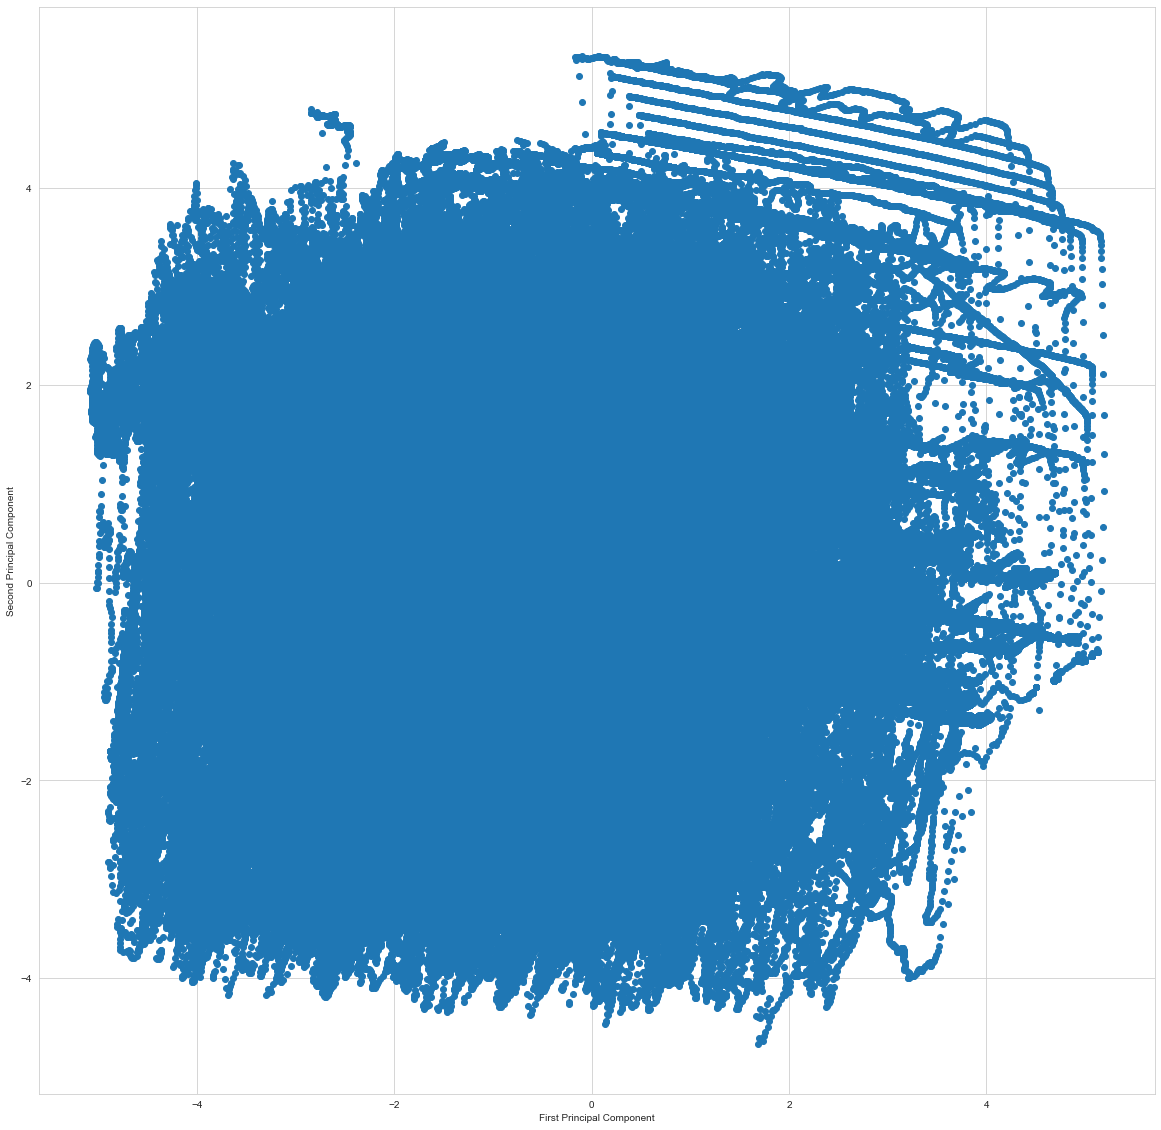

In [41]:
plt.figure(figsize=(20,20))
plt.scatter(x_pca_tab['x'],x_pca_tab['y'], cmap = 'plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# KMeans Clustering

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10)
kmeans.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[-2.70124048 -0.46912603]
 [ 0.0989347   1.08346979]
 [-0.69316025 -0.87524547]
 [ 3.41702393 -0.64826062]
 [-2.86020813  1.8022819 ]
 [ 1.41998541 -0.84903388]
 [-0.69999975  2.84147341]
 [-0.09726185 -2.59064482]
 [-2.81062794 -2.41993559]
 [ 2.04908714  2.00270498]]
[3 3 3 ... 2 2 2]


Text(0, 0.5, 'Second Principal Component')

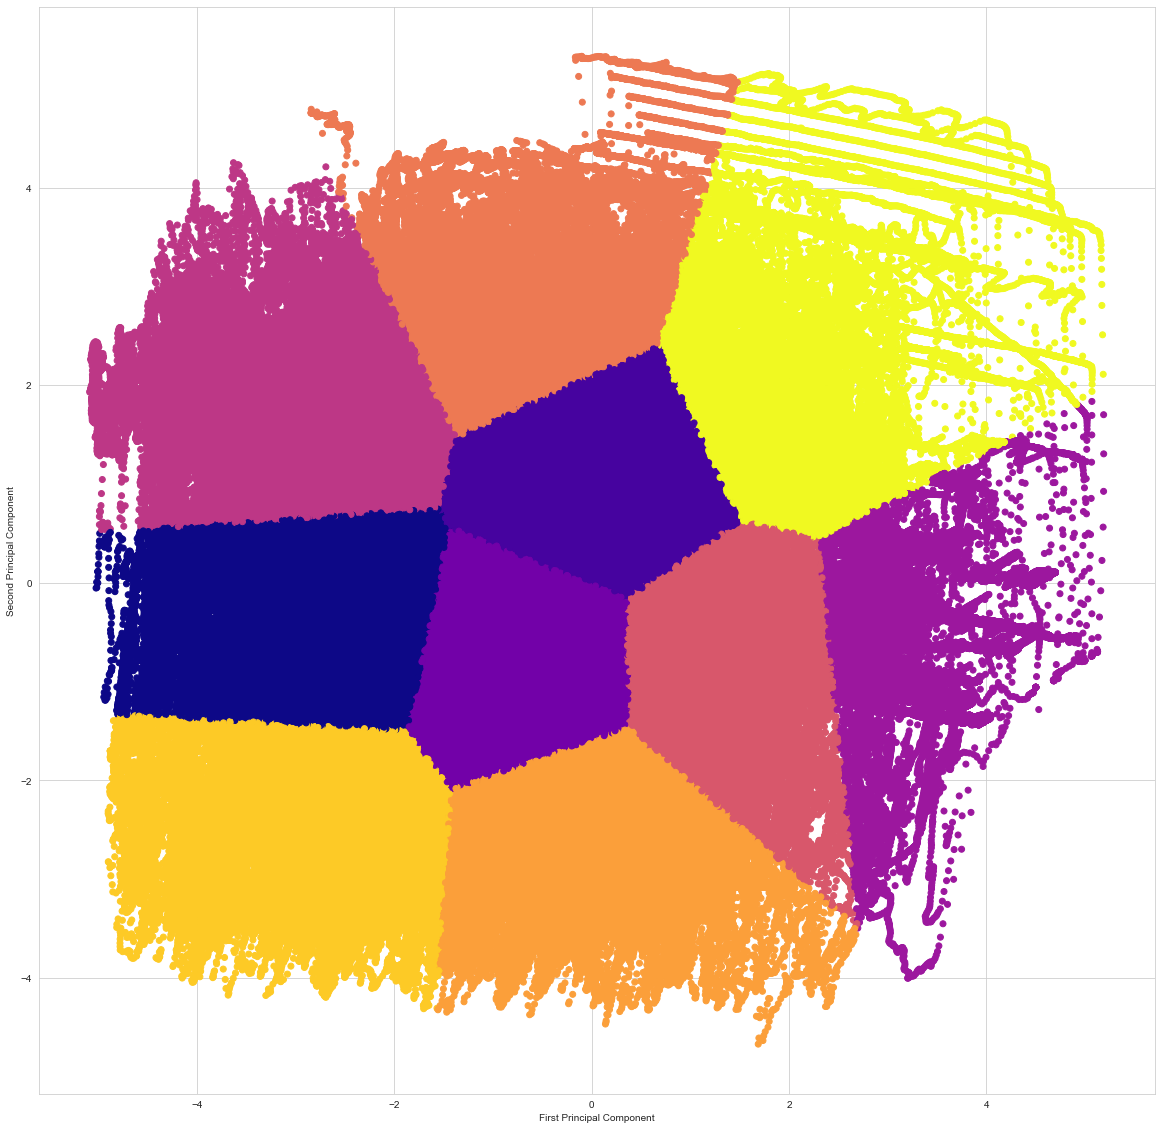

In [44]:
plt.figure(figsize=(20,20))
plt.scatter(x_pca_tab['x'],x_pca_tab['y'],  c=kmeans.labels_, cmap = 'plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')